
# Netflix Catalog EDA — Data Cleaning, Exploration & Insights

**Goal:**  
Analyze Netflix’s catalog composition, audience targeting, geography, release patterns, and platform growth.

**Dataset:** Netflix Movies & TV Shows (Kaggle)  
**Stack:** Python, Pandas, NumPy, Matplotlib, Seaborn  
**Notebook Type:** Exploratory Data Analysis (EDA)

---

## Table of Contents
1. Importing & Loading Data  
2. Data Cleaning & Preprocessing  
3. Composition Analysis  
4. Temporal Trends  
5. Relationships & Correlations  
6. Insights Summary  
7. Limitations & Next Steps



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
path = '/content/drive/MyDrive/Data_Analytics_Portfolio/01_EDA_Project/data/netflix_titles.csv'
df = pd.read_csv(path)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#First start with analyzing no. of colums and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
#Finding exact no. of duplicate rows
duplicates = df.duplicated().sum()
print(f'There are {duplicates} duplicates in this dataset')

There are 0 duplicates in this dataset


In [ ]:
#Since the date_added is stored as string, we can't perform time-based analysis, So we convert date_added(String) into datetime

df["date_added"] = pd.to_datetime(df["date_added"], errors='coerce')
df.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#Extracting months and years out of date_added to analyze how Netflix’s catalog grew over time while leaving Missing values left as NaT to avoid creating false dates
df["year_added"] = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,98
release_year,0
rating,4
duration,3


In [ ]:
#Since country and rating have low no. of mising values, and lables under categorical data , so it is safe to fill


df['country'] = df['country'].fillna('Unknown')
df['rating']  = df['rating'].fillna('Unknown')




In [ ]:
#Checking the isnull status after filling values

df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,0
date_added,98
release_year,0
rating,0
duration,3


In [ ]:
#Before analyzing text fields like country or genre, I trimmed whitespace using .str.strip() to ensure consistency.
#Otherwise, values like ‘India ’ and ‘India’ would be treated as different categories, leading to incorrect counts and visualizations.

df['country'] = df['country'].astype(str).str.strip()

#before fixing whitespaces
df['country'].value_counts().head(10)

,count
country,
United States,2818
India,972
Unknown,831
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124


In [ ]:
df['title'] = df['title'].str.strip()
df['listed_in'] = df['listed_in'].str.strip()
df['country'] = df['country'].str.strip()




In [ ]:
df['country'] = df['country'].str.strip()
df['country'].value_counts().head(10)


#Used .str.strip() on country, listed_in, and title columns to remove any leading/trailing spaces.
#No changes observed, indicating these fields were already standardized, confirms data cleanliness before analysis.

,count
country,
United States,2818
India,972
Unknown,831
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8709 non-null   float64       
 13  month_added   8709 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 963.4+ KB


Summary till here

I did minimal, purposeful cleaning focused on analysis integrity, making dates usable, categories consistent, and documenting every change.

1. Dropped X duplicate rows.

2. Converted date_added; created year_added, month_added to enable time analysis.

3. Filled missing country and rating with ‘Unknown’ to keep aggregates consistent.

# First Composition Analysis
What % are Movies vs TV Shows?

In [ ]:
#Find % of movies VS TV Shows
df['type'].value_counts(normalize=True)*100

,proportion
type,
Movie,69.615079
TV Show,30.384921


In [ ]:
#I first checked the distribution of the type column to see the content mix.
#Movies account for roughly 70% of the catalog, while TV Shows make up about 30%.
#This suggests Netflix’s catalog historically leaned toward single-view content (movies), but the TV share may be growing — something I’ll confirm by checking trends over time later.


type_counts = df['type'].value_counts().reset_index()
type_counts.columns = ['Type', 'Count']
type_counts['Percentage'] = round((type_counts['Count'] / type_counts['Count'].sum()) * 100, 2)

type_counts


,Type,Count,Percentage
0,Movie,6131,69.62
1,TV Show,2676,30.38


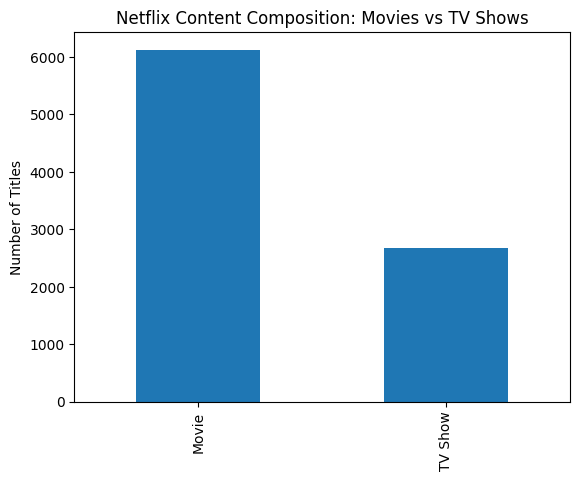

In [ ]:
#Plot the results in to the form of bar graph for more readability
type_counts.plot(kind='bar', x='Type', y='Count', legend=False)
plt.title('Netflix Content Composition: Movies vs TV Shows')
plt.ylabel('Number of Titles')
plt.xlabel('')
plt.savefig('/content/drive/MyDrive/Data_Analytics_Portfolio/01_EDA_Project/figures/netflix_growth.png', bbox_inches='tight', dpi=150)
plt.show()


# Observation:
Netflix has ~6,100 Movies and ~2,600 TV Shows.

# Insight:
The catalog is dominated by Movies (~70%), suggesting Netflix historically leaned toward single-session content.
Later, I’ll check if the share of TV content is increasing year over year.

# Second Composition Analysis
Audience: What are the top 10 content ratings

In [ ]:
df['rating'].unique()

#TV-MA   → Mature Audience (18+)
#TV-14   → Teens (14+)
#PG      → Parental Guidance
#R       → Restricted (17+)
#G       → General Audience


array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'Unknown', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
#This dataset contain messy or unclear ratings such as:

#UR → means “Unrated”
#NR → also means “Not Rated”
#Unknown → you filled these earlier for missing values

#To standardize:

df['rating'].replace({'UR': 'Unrated', 'NR': 'Unrated'})


#Now categories are consistent.



,rating
0,PG-13
1,TV-MA
2,TV-MA
3,TV-MA
4,TV-MA
...,...
8802,R
8803,TV-Y7
8804,R
8805,PG


In [ ]:
rating_counts = df['rating'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Count']

rating_counts.head(10)

,Rating,Count
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


In [ ]:
#Adding a percentage column (for interpretation)

rating_counts['Percentage'] = round((rating_counts['Count'] / rating_counts['Count'].sum()) * 100, 2)
rating_counts.head(10)


,Rating,Count,Percentage
0,TV-MA,3207,36.41
1,TV-14,2160,24.53
2,TV-PG,863,9.80
3,R,799,9.07
4,PG-13,490,5.56
5,TV-Y7,334,3.79
6,TV-Y,307,3.49
7,PG,287,3.26
8,TV-G,220,2.50
9,NR,80,0.91


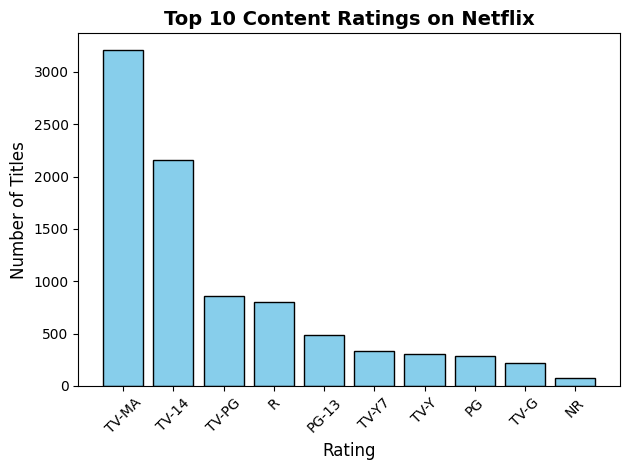

In [ ]:
#Making the data visualize by using seaborn barplot

rating_counts = df['rating'].value_counts().head(10)

plt.bar(rating_counts.index, rating_counts.values, color='skyblue', edgecolor='black')

plt.title('Top 10 Content Ratings on Netflix', fontsize=14, fontweight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Data_Analytics_Portfolio/01_EDA_Project/figures/netflix_growth.png', bbox_inches='tight', dpi=150)
plt.show()






# Observation:

TV-MA and TV-14 dominate Netflix’s content.

Family-oriented ratings (TV-Y, G) have a much smaller presence.

# Insight:
Netflix primarily targets teen and adult audiences, aligning with its focus on mature, binge-worthy storytelling.

# Third Composition Analysis
Which 10 countries account for most titles?

In [ ]:
df["country"]

,country
0,United States
1,South Africa
2,Unknown
3,Unknown
4,India
...,...
8802,United States
8803,Unknown
8804,United States
8805,United States


In [ ]:
#Finding top 10 countires that produces content

top_countries = df["country"].value_counts().head(10)

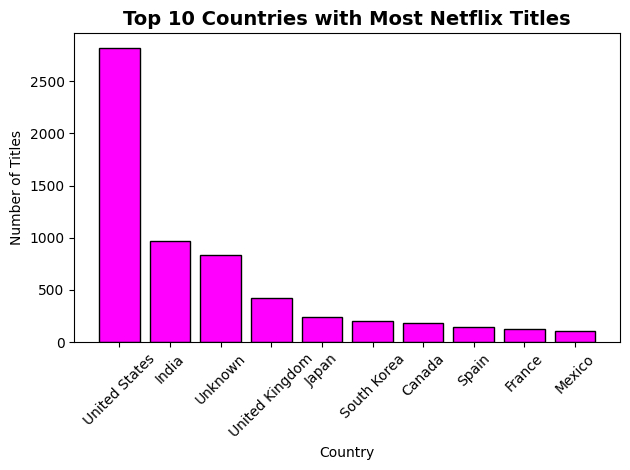

In [ ]:
#Plotting the bar graph for showing insights of top 10 countires producing content on netflix

plt.bar(top_countries.index, top_countries.values, color='magenta', edgecolor='black')
plt.title('Top 10 Countries with Most Netflix Titles', fontsize=14, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Data_Analytics_Portfolio/01_EDA_Project/figures/netflix_growth.png', bbox_inches='tight', dpi=150)
plt.show()



#Observation:
The United States leads by a large margin, followed by India and the United Kingdom.

#Insight:
Netflix’s catalog is dominated by English-language content, but India’s strong presence signals Netflix’s investment in regional markets.

#Trend Analysis

What’s the distribution of release_year (are titles mostly recent or older)?

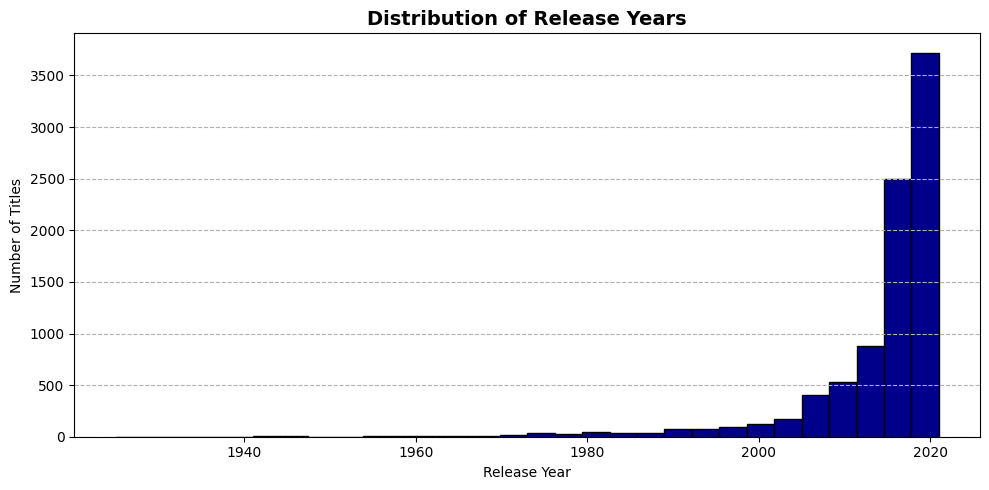

In [ ]:
#Here I just have plotted release year against no of titles on histogram

plt.figure(figsize=(10,5))
plt.hist(df['release_year'], bins=30, color='darkblue', edgecolor='black')
plt.title('Distribution of Release Years', fontsize=14, fontweight='bold')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Data_Analytics_Portfolio/01_EDA_Project/figures/netflix_growth.png', bbox_inches='tight', dpi=150)
plt.show()


# Observation:
Most Netflix titles were released after 2010, with a steep rise after 2015.

# Insight:
Netflix’s catalog focuses on modern releases, aligning with its digital-first audience rather than archival cinema.

# Trend Analysis

> Add blockquote



Platform Growth — How many titles were added per year_added?

In [ ]:
#Finding null values in year_added
df['year_added'].isna().sum()

np.int64(98)

In [ ]:
#Since the no is very less so we can drop it, It won't impact out analysis

yearly_additions = df.dropna(subset=['year_added'])

In [ ]:
# Counting and sorting how many titles added each year
growth = yearly_additions['year_added'].value_counts().sort_index()


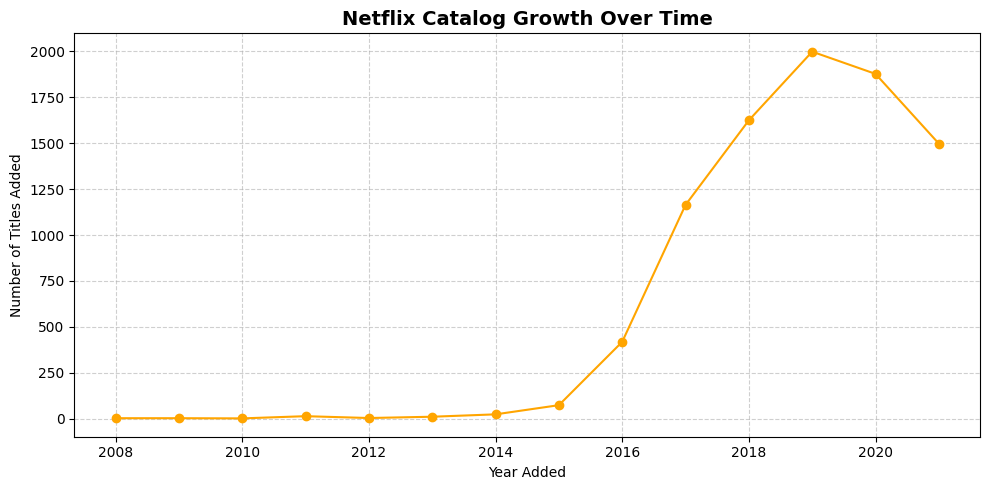

In [ ]:
#Plotting the trend

plt.figure(figsize=(10,5))
plt.plot(growth.index, growth.values, marker='o', color='orange')
plt.title('Netflix Catalog Growth Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig('/content/drive/MyDrive/Data_Analytics_Portfolio/01_EDA_Project/figures/netflix_growth.png', bbox_inches='tight', dpi=150)
plt.show()



# Observation:
Netflix’s content library grew rapidly from 2015 to 2020, peaking in 2019.

# Insight:
This surge coincides with the global streaming boom during the pandemic — Netflix aggressively expanded its catalog during that period.

# **Building Relationships**

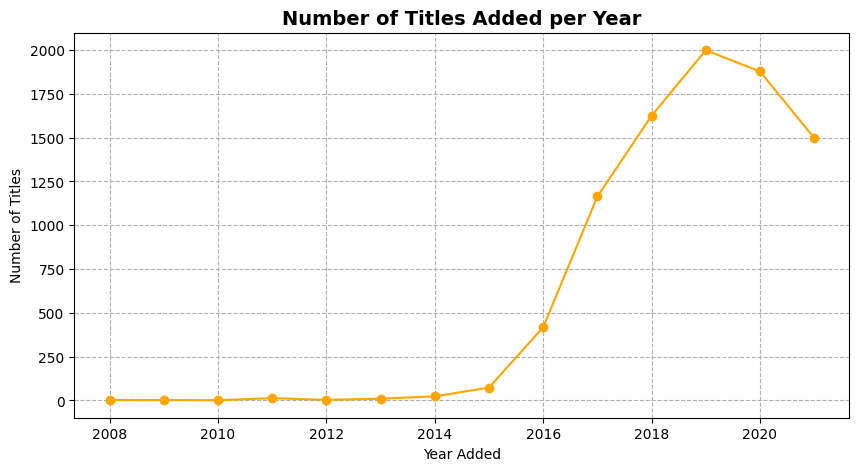

In [ ]:
#Time Relationships
#Did Netflix add more content during certain years?


growth = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(growth.index, growth.values, marker='o', color='orange')
plt.title('Number of Titles Added per Year', fontsize=14, fontweight='bold')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.grid(True, linestyle='--')

plt.savefig('/content/drive/MyDrive/Data_Analytics_Portfolio/01_EDA_Project/figures/netflix_growth.png', bbox_inches='tight', dpi=150)
plt.show()



# Observation:
Titles increased sharply after 2015, peaking around 2019–2020.

# Insight:
Netflix grew aggressively during the global streaming boom and pandemic.

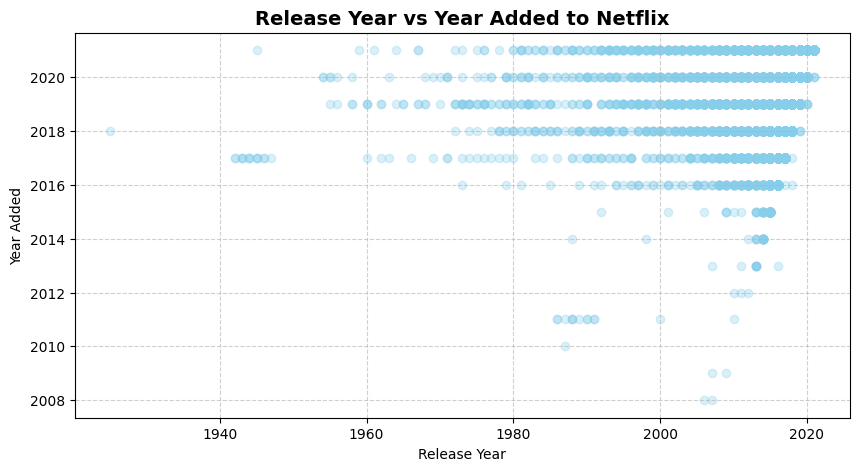

In [ ]:
#Time Relationships
#Are the titles added mostly recent releases or older ones?

plt.figure(figsize=(10,5))
plt.scatter(df['release_year'], df['year_added'], alpha=0.3, color='skyblue')
plt.title('Release Year vs Year Added to Netflix', fontsize=14, fontweight='bold')
plt.xlabel('Release Year')
plt.ylabel('Year Added')
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('/content/drive/MyDrive/Data_Analytics_Portfolio/01_EDA_Project/figures/netflix_growth.png', bbox_inches='tight', dpi=150)
plt.show()



# Observations:

1. Most of the points are clustered close to the diagonal, especially after 2015.
Netflix has been adding newly released titles — typically from the same year or just 1–2 years earlier.

2. There are also several dots where older releases (2000s, 1990s) were added in recent years like 2018–2020.

The density of points increases after 2016, indicating Netflix’s rapid catalog expansion period.

#Insights:

1. Netflix’s content strategy primarily focuses on recent releases and Originals, aligning with its identity as a modern streaming-first platform.
2. However, the presence of many older titles added in later years shows that Netflix also licenses older content to diversify its catalog and appeal to nostalgic or classic audiences.

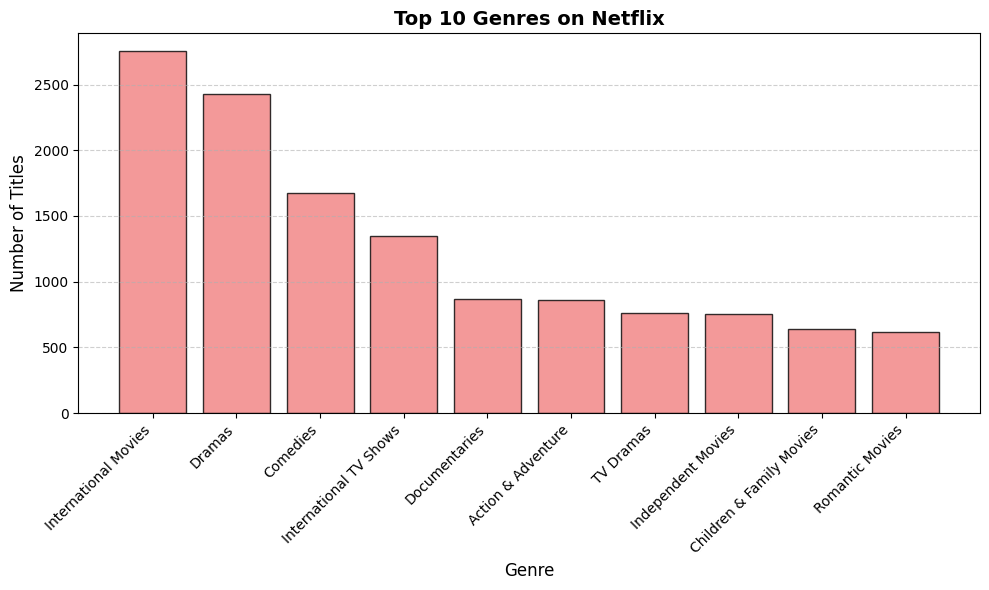

In [ ]:
# What are the top genres overall?

# Step 1: Prepare the data (safe even if df changed)
genres = df['listed_in'].dropna().str.split(',').explode().str.strip()
top_genres = genres.value_counts().head(10)

# Step 2: Plot
plt.figure(figsize=(10,6))  # Bigger width for better label spacing
plt.bar(top_genres.index, top_genres.values, color='lightcoral', edgecolor='black', alpha=0.8)
plt.title('Top 10 Genres on Netflix', fontsize=14, fontweight='bold')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels diagonally for readability
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()  # Adjust layout to prevent clipping

plt.savefig('/content/drive/MyDrive/Data_Analytics_Portfolio/01_EDA_Project/figures/netflix_top_genres.png', bbox_inches='tight', dpi=150)
plt.show()


# Observation:

Top genres: Dramas, Comedies, Documentaries, International Movies.

# Insight:

Netflix’s catalog is story-driven, with a mix of global and emotional storytelling content.

# **Insights Summary**



**1. Content Composition:** ~70% Movies and 30% TV Shows → Netflix’s catalog is still movie-heavy but shifting toward serial content for engagement.

**2. Audience Ratings:** Majority are **TV-MA** and **TV-14** → Netflix primarily targets teens and adults; limited kids/family focus.

**3. Geography:** **US** dominates, followed by **India**, **UK**, **Japan**, and **South Korea** → global expansion with strong local content presence.

**4. Vintage:** Most titles are released **after 2010** → Netflix’s library emphasizes modern, relevant content.

**5. Platform Growth:** Catalog grew rapidly from **2015–2019**, peaking in **2019** → matches Netflix’s international expansion phase.

**6. Recency vs Backfill:** Scatter shows many older titles added later → Netflix balances new releases with back-catalog licensing.

**7. Genres:** Top 3 = *International Movies*, *Dramas*, *Comedies* → emotional storytelling and global appeal dominate.




# **Limitations & Next Steps**


**Limitations:**
1. `country` field often has multiple countries → counts may double count co-productions.
2. Missing or partial `year_added` values could slightly skew growth trends.
3. `date_added` ≠ `release_year` → timing mismatch affects correlation interpretation.
4. No audience/viewership data → analysis limited to catalog supply, not consumption.
5. Genres are broad and overlapping → future categorization could use topic modeling or NLP.

**Next Steps:**
1. Analyze **regional content mix** (type, genre, rating by country).
2. Add **percentage-based growth and genre trend plots** over time.
3. Integrate **user ratings or viewership data** if available.
4. Explore **content recommendation** or **clustering by genre/region** in future phases.
